# ch3: Statistical plots with Seaborn

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
auto = pd.read_csv('auto-mpg.csv')

In [3]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


## Simple linear regressions

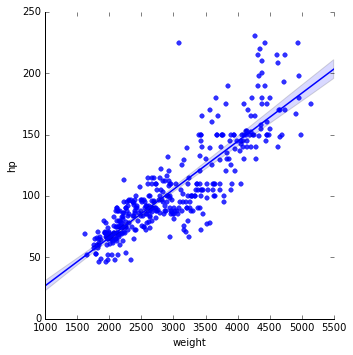

In [4]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show()

## Plotting residuals of a regression

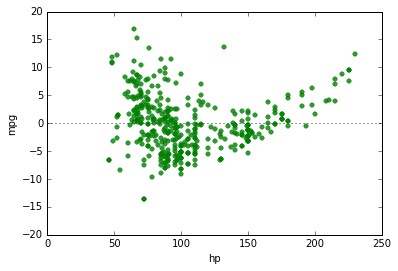

In [5]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()

## Higher-order regressions

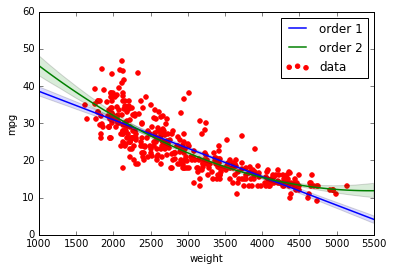

In [6]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

## Grouping linear regressions by hue

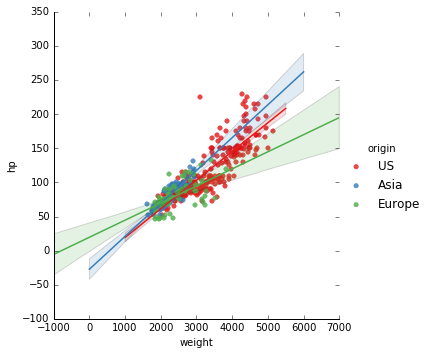

In [7]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight',y='hp',data=auto,hue='origin',palette='Set1')

# Display the plot
plt.show()

# Grouping linear regressions by row or column

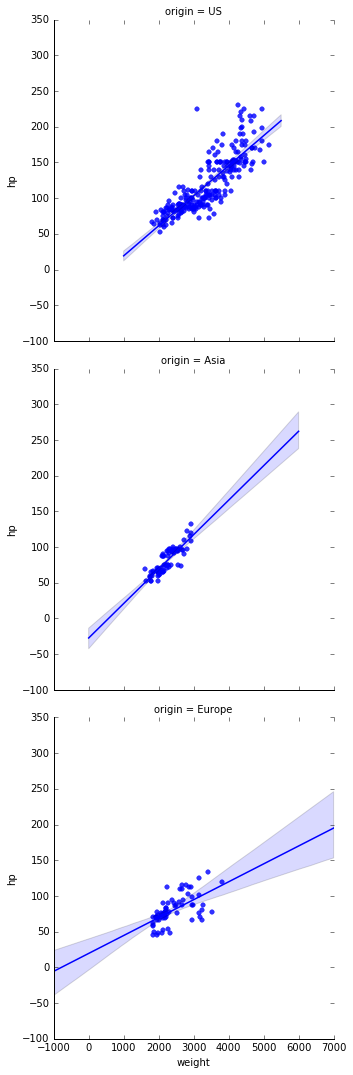

In [8]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight',y='hp',data=auto,row='origin')

# Display the plot
plt.show()

# Constructing strip plots

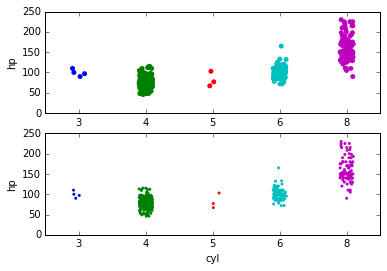

In [9]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, size=3, jitter=True)

# Display the plot
plt.show()

## Constructing swarm plots

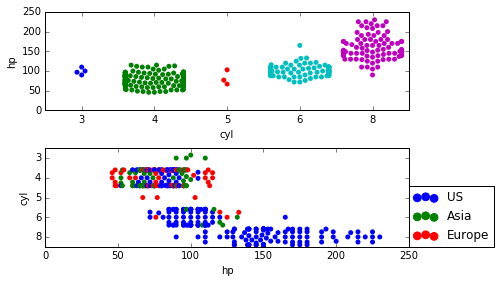

In [10]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl',y='hp',data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp',y='cyl',data=auto,hue='origin',orient='h')
plt.legend(loc=(1,0))

# Display the plot
plt.tight_layout()
plt.show()

## Constructing violin plots

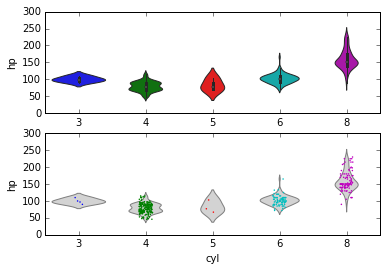

In [11]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto,color='lightgray',inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto,size=1.5,jitter=True)

# Display the plot
plt.show()

## Plotting joint distributions

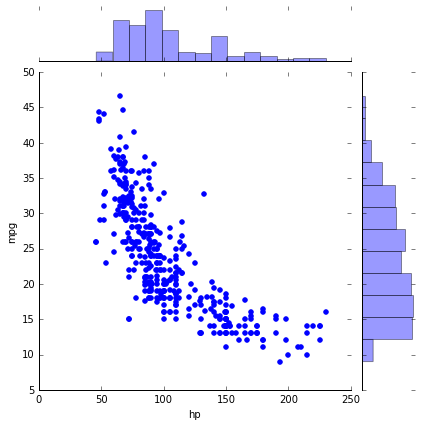

In [12]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp',y='mpg',data=auto)

# Display the plot
plt.show()

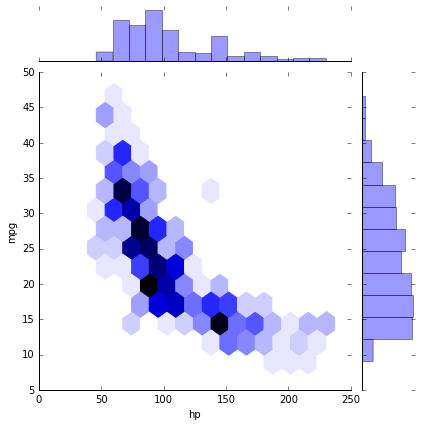

In [13]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp',y='mpg',data=auto,kind='hex')

# Display the plot
plt.show()

## Plotting distributions pairwise

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


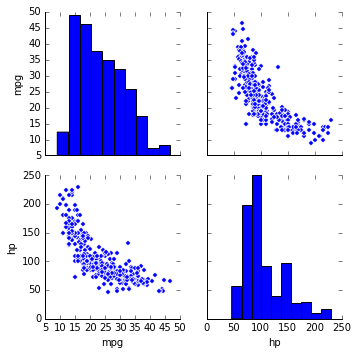

In [14]:
auto1 = auto.loc[:,('mpg','hp','origin')]
# Print the first 5 rows of the DataFrame
print(auto1.head())

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto1)

# Display the plot
plt.show()

# comment
# Seaborn's pairplots are an excellent way of visualizing the relationship between all continuous variables in a dataset.

    mpg   hp  origin
0  18.0   88      US
1   9.0  193      US
2  36.1   60    Asia
3  18.5   98      US
4  34.3   78  Europe


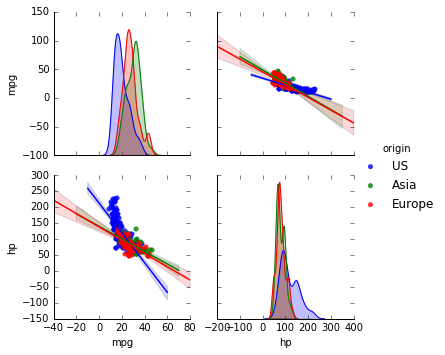

In [15]:
# Print the first 5 rows of the DataFrame
print(auto1.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto1,hue='origin',kind='reg')

# Display the plot
#plt.tight_layout()
plt.show()

## Visualizing correlations with a heatmap

             mpg        hp    weight     accel     displ
mpg     1.000000 -0.778427 -0.832244  0.423329 -0.805127
hp     -0.778427  1.000000  0.864538 -0.689196  0.897257
weight -0.832244  0.864538  1.000000 -0.416839  0.932994
accel   0.423329 -0.689196 -0.416839  1.000000 -0.543800
displ  -0.805127  0.897257  0.932994 -0.543800  1.000000


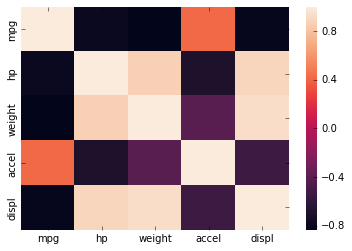

In [16]:
auto2 = auto[['mpg','hp','weight','accel','displ']]
cov_matrix = auto2.corr()

# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()